In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from IPython.display import Image

%matplotlib inline

## Generate data

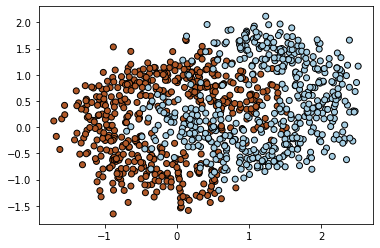

In [2]:
def generate_halfmoon(n1, n2, max_angle=5.14):
    alpha = np.linspace(0, max_angle, n1)
    beta = np.linspace(0, max_angle, n2)
    X1 = np.vstack([np.cos(alpha), np.sin(alpha)])\
        + 0.3 * np.random.randn(2,n1)
    X2 = np.vstack([1 - np.cos(beta), 1 - np.sin(beta) - 0.5])\
        + 0.3 * np.random.randn(2,n2)
    y1, y2 = -np.zeros(n1), np.ones(n2)
    return X1, y1, X2, y2

X1, y1, X2, y2 = generate_halfmoon(500, 500)
#X1, y1, X2, y2 = generate_halfmoon(500, 100)
X = np.hstack([X1, X2])  # (2, 1000)
Y = np.hstack([y1, y2]) # (1000) 

plt.scatter(X[0,:], X[1,:], c=Y, cmap='Paired_r', edgecolors='k');

plt.show()


## Save date in a dateframe (Pandas)

In [3]:
data = dict()

data['y'] = Y
data['x0'] = X[0]
data['x1'] = X[1]

df = pd.DataFrame(data)
print(df)
print()
print(df.iloc[2]) #get one sample

       y        x0        x1
0   -0.0  0.866612  0.324840
1   -0.0  1.228557  0.012840
2   -0.0  1.240221  0.034361
3   -0.0  1.465936 -0.060117
4   -0.0  0.609391  0.306942
..   ...       ...       ...
995  1.0  0.397578  1.438266
996  1.0  0.980975  1.469519
997  1.0  0.683843  1.622285
998  1.0  0.953064  1.698691
999  1.0  0.562854  1.279365

[1000 rows x 3 columns]

y    -0.000000
x0    1.240221
x1    0.034361
Name: 2, dtype: float64


## Split data  (sklearn)

In [4]:
train, test = train_test_split(df, test_size=0.2, shuffle=True)

print('Train data shape', train.shape)
print('Test data shape', test.shape)

print(test)

Train data shape (800, 3)
Test data shape (200, 3)
       y        x0        x1
975  1.0  0.878288  1.512618
854  1.0  1.775635  1.180025
855  1.0  1.844063  0.759763
509  1.0 -0.343439  0.497824
716  1.0  1.417416 -0.588369
..   ...       ...       ...
73  -0.0  0.089138  0.159187
363 -0.0 -1.059940 -0.420783
959  1.0  1.546047  1.289125
411 -0.0 -0.911332 -0.266744
680  1.0  0.807339 -0.993644

[200 rows x 3 columns]


## K-NN

In [5]:
def knn(train_features, train_labels, sample, k):
    
    # Normalize data
    tf_min = train_features.min()
    tf_max = train_features.max()
    train_f_norm =(train_features-tf_min)/(tf_max-tf_min)
    sample_norm =(sample-tf_min)/(tf_max-tf_min)
    
    # lists to hold k nearest points
    list_dist = np.ones(k)*np.inf
    list_prediction = np.zeros(k)
    
    # find k nearest points
    for i in range(train.shape[0]):
        dist = np.linalg.norm(train_f_norm.iloc[i] - sample_norm)
        if dist < np.max(list_dist):
            idx = np.argmax(list_dist)
            list_dist[idx] = dist
            list_prediction[idx] = train_labels.iloc[i]
    # return average
    return int(np.round(np.mean(list_prediction)))
    

In [6]:
class Classification_eval(object):
    def __init__(self):
        self.TP = 0 # correctly identified positive 
        self.FP = 0 # falsely identified positive 
        self.TN = 0 # correctly identified negative 
        self.FN = 0 # falsely identified negative 
    
    def update(self, pred, label):
        if pred == label:
            if pred == 1:
                self.TP += 1
            else:
                self.TN += 1
        else:
            if pred == 1:
                self.FP += 1
            else: 
                self.FN += 1
    
    def accuarcy(self): # accuarcy
        return np.round((self.TP + self.TN)/(self.TP + self.TN + self.FP + self.FN), 4)
    
    def precision(self): # percentage of the positive from the estimated positive
        if (self.TP + self.FP) == 0:
            return 0
        return np.round(self.TP/(self.TP + self.FP), 4)
    
    def recall(self): # percentage of correctly identified positive of all the positive
        if (self.TP + self.FN) == 0:
            return 0
        return np.round(self.TP/(self.TP + self.FN), 4)

In [7]:
train_labels = train['y']
train_features = train.drop(columns='y')

test_labels = test['y']
test_features = test.drop(columns='y') 

K = [1, 5, 10, 20, 50, 100, 200]
for k in K:
    log = Classification_eval()
    for i in range(test_features.shape[0]):
        pred = knn(train_features, train_labels, test_features.iloc[i], k)
        log.update(pred, test_labels.iloc[i])

    print('Accuarcy = ', log.accuarcy(), ' precision =', log.precision(), ' recall =', log.recall(), ' with k =', k)
    

Accuarcy =  0.815  precision = 0.802  recall = 0.8265  with k = 1
Accuarcy =  0.885  precision = 0.9032  recall = 0.8571  with k = 5
Accuarcy =  0.9  precision = 0.9535  recall = 0.8367  with k = 10
Accuarcy =  0.9  precision = 0.9333  recall = 0.8571  with k = 20
Accuarcy =  0.9  precision = 0.9239  recall = 0.8673  with k = 50
Accuarcy =  0.905  precision = 0.9247  recall = 0.8776  with k = 100
Accuarcy =  0.845  precision = 0.8454  recall = 0.8367  with k = 200


## Prediction boundary

For k = 1
<img src="k_1.png" width="300"/>

For k = 5
<img src="k_5.png" width="300"/>

For k = 20
<img src="k_20.png" width="300"/>

For k = 200
<img src="k_200.png" width="300"/>

## With non ballanced data




For k = 1
<img src="skewed_k_1.png" width="300"/>

For k = 5
<img src="skewed_k_5.png" width="300"/>

For k = 20
<img src="skewed_k_20.png" width="300"/>

For k = 70
<img src="skewed_k_70.png" width="300"/>